# 制作K线图


在 Python 中绘制k线图有很多方法，例如可以直接用 matplotlib 进行绘制。

本页面将基于一个简单易上手的库 `mplfinance` 进行展开。

```{admonition} 在线刷题
:class: seealso

检查 or 强化 `Pandas` 数据分析操作？<a href="https://www.heywhale.com/mw/project/6146c0318447b8001769ff20" target="_blank">👉在线体验「Pandas进阶修炼300题」</a>
```

```{note} 
本页面代码可以[在线编辑、执行](../指引/在线执行.md)！
```

## 数据处理

```{admonition} 注意
:class: attention

使用 mplfinance 有固定的格式!

数据必须是 Pandas DataFrame 格式，必须包含开盘价、最高价、最低价和收盘价，需要使用 DatetimeIndex 作为索引！
```

### 选择列


筛选 `df1` 中`'日期','开盘','最高','最低','收盘','成交量'`几列，并命名为新数据框 `df_new`

In [59]:
import pandas as pd
import mplfinance as mpf
import warnings
warnings.filterwarnings("ignore")
df1 = pd.read_csv("000001_daily.csv")
df2 = pd.read_csv("000001_5min.csv")
df2['时间'] = pd.to_datetime(df2['时间'])

In [13]:
df_new = df1[['日期','开盘','最高','最低','收盘','成交量']]
df_new.head()

,日期,开盘,最高,最低,收盘,成交量
0,2017/1/3,8.27,8.34,8.25,8.32,459840
1,2017/1/4,8.31,8.34,8.30,8.32,449330
2,2017/1/5,8.33,8.34,8.31,8.33,344373
3,2017/1/6,8.33,8.33,8.27,8.29,358154
4,2017/1/9,8.29,8.33,8.27,8.31,361082


### 修改类型

将 df_new 的 日期 修改为时间类型

In [14]:
df_new['日期'] = pd.to_datetime(df_new['日期'])

### 修改列名

将 df_new 的列名修改为 `'Date','Open','High','Low','Close','Volume'`

In [15]:
df_new.columns = ['Date','Open','High','Low','Close','Volume']
df_new.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-03,8.27,8.34,8.25,8.32,459840
1,2017-01-04,8.31,8.34,8.30,8.32,449330
2,2017-01-05,8.33,8.34,8.31,8.33,344373
3,2017-01-06,8.33,8.33,8.27,8.29,358154
4,2017-01-09,8.29,8.33,8.27,8.31,361082


### 修改索引


将 df_new 的索引列修改为 Date 列

In [16]:
df_new.set_index(["Date"], inplace=True)
df_new.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,8.27,8.34,8.25,8.32,459840
2017-01-04,8.31,8.34,8.30,8.32,449330
2017-01-05,8.33,8.34,8.31,8.33,344373
2017-01-06,8.33,8.33,8.27,8.29,358154
2017-01-09,8.29,8.33,8.27,8.31,361082


## 制作K线图

### 日线

根据 df_new 绘制日线级K线

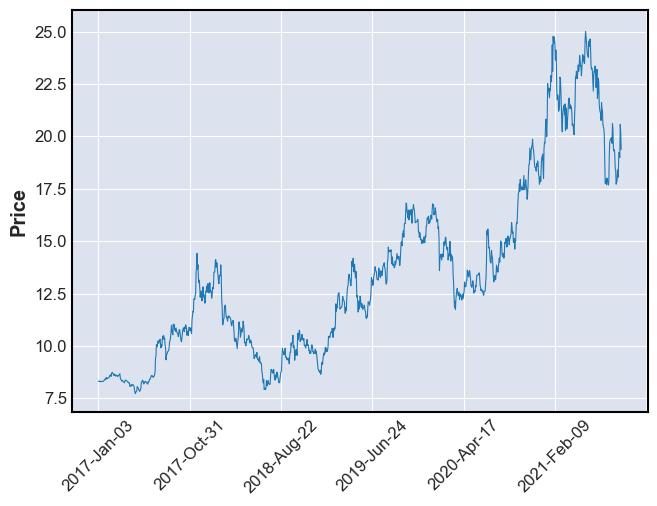

In [17]:
mpf.plot(df_new, type='line')

### 添加移动均线

在上一题的基础上，添加5日、10日、15日移动均线

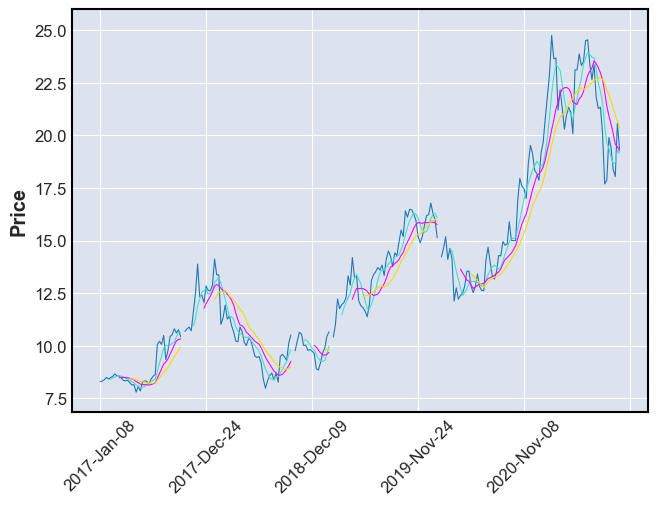

In [130]:
mpf.plot(df_new, type='line',mav=(5,10,15))

### 添加成交量

在上一题的基础上，添加成交量

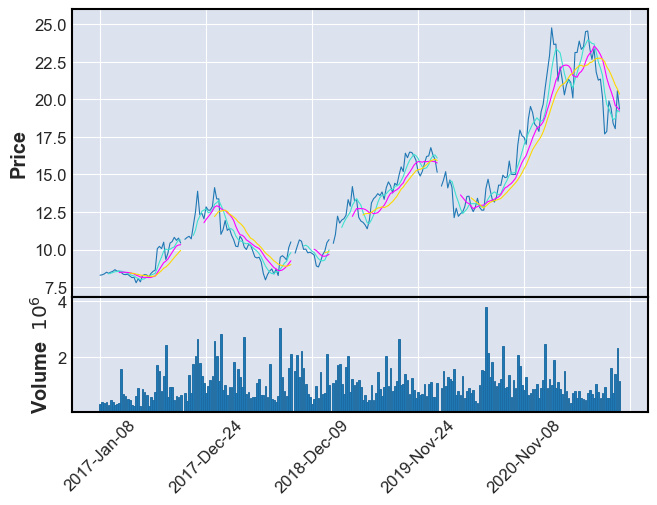

In [131]:
mpf.plot(df_new, type='line',mav=(5,10,15), volume=True)

### 蜡烛图

使用 df2 数据，筛选出 8月3日 的数据，制作蜡烛图

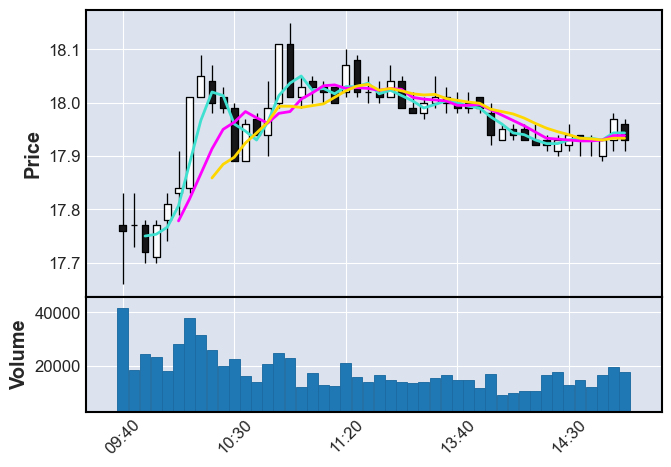

In [61]:
df_new = df2[(df2['时间'] > '2021-08-03 09:35:00') & (df2['时间'] < '2021-08-03 15:00:00')]
df_new = df_new[['时间','开盘','最高','最低','收盘','成交量']]
df_new.columns = ['Date','Open','High','Low','Close','Volume']
df_new.set_index(["Date"], inplace=True)

mpf.plot(df_new, type='candle',mav=(3,6,9), volume=True)

### 展示非交易时间


使用 df2 数据，筛选 8月3日-8月4日的数据，制作蜡烛图并展示非交易时间区间

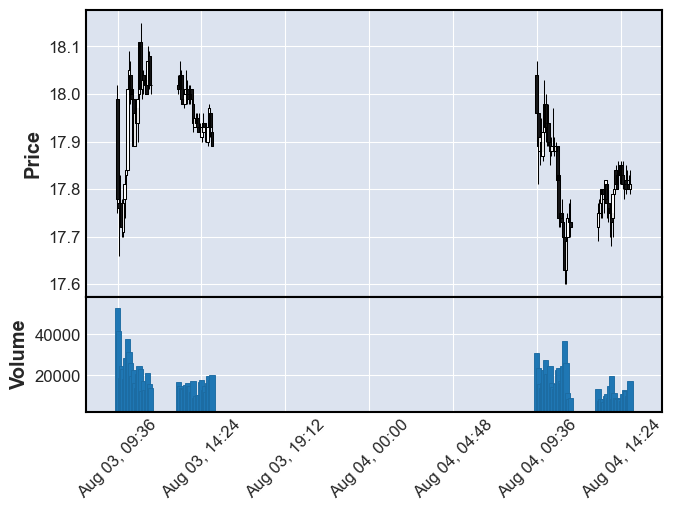

In [62]:
df_new = df2[(df2['时间'] > '2021-08-03 9:00:00') & (df2['时间'] < '2021-08-04 15:00:00')]
df_new = df_new[['时间','开盘','最高','最低','收盘','成交量']]
df_new.columns = ['Date','Open','High','Low','Close','Volume']
df_new.set_index(["Date"], inplace=True)
mpf.plot(df_new,type='candle',show_nontrading=True, volume=True)